In [101]:
#pip install mca

In [315]:
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

In [317]:
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [319]:
APK = pd.read_csv("APK.csv")

In [321]:
APK.dtypes

timestamp                      object
destination_name               object
departure_status               object
scheduled_arrival              object
real_arrival                   object
scheduled_departure            object
real_departure                 object
arrival_difference            float64
departure_difference          float64
ArRTown                        object
nearest_datetime               object
Période                        object
95                            float64
98                            float64
E10                           float64
gazole                        float64
temperature_2m                float64
precipitation                 float64
rain                          float64
snowfall                      float64
wind_speed_10m                float64
wind_gusts_10m                float64
visibility                    float64
is_day                           bool
Date                           object
day_of_week                   float64
day_type    

# Cleaning again

In [323]:
APK['real_arrival'] = pd.to_datetime(APK['real_arrival'], format='%Y-%m-%d %H:%M:%S')
APK['real_departure'] = pd.to_datetime(APK['real_departure'], format='%Y-%m-%d %H:%M:%S')

APK = APK.sort_values(by='destination_name', ascending=False)
APK['destination_name'] = pd.factorize(APK["destination_name"])[1]

APK = APK.sort_values(by='real_arrival', ascending=True)

APK["departure_status"] = APK["departure_status"].astype("string")
APK["is_day"] = APK["is_day"].astype(int)

ValueError: Length of values (18) does not match length of index (10728)

In [242]:
APK['pourc_validations'] = APK['pourc_validations'].fillna(0)

In [245]:
APK = APK.drop(["real_departure", "ArRTown", "Date", "day_type", "is_bank_holiday", "is_weekend"], axis=1)

# PCA

In [248]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical variables
numerical_vars = APK_learn.select_dtypes(include=['float64'])

# Standardize the numerical variables
scaler = StandardScaler()
numerical_vars_scaled = scaler.fit_transform(numerical_vars)

# Perform PCA
pca = PCA()
pca_results = pca.fit_transform(numerical_vars_scaled)

In [250]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(
    pca_results,
    columns=[f'PC{i+1}' for i in range(pca_results.shape[1])]
)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Output the PCA results and explained variance
print("Explained Variance Ratio:", explained_variance)
print("PCA DataFrame Head:\n", pca_df.head())

Explained Variance Ratio: [0.32813484 0.24044399 0.15503066 0.12366118 0.07835509 0.06681202
 0.00558542 0.0019768 ]
PCA DataFrame Head:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.213969  0.902740 -0.407592  0.292462  0.609817 -0.031625 -0.272152   
1  0.202875  0.896615 -0.366897  0.073816  0.626800 -0.036441 -0.272397   
2  0.202875  0.896615 -0.366897  0.073816  0.626800 -0.036441 -0.272397   
3  0.213969  0.902740 -0.407592  0.292462  0.609817 -0.031625 -0.272152   
4  0.202875  0.896615 -0.366897  0.073816  0.626800 -0.036441 -0.272397   

        PC8  
0 -0.006349  
1 -0.007774  
2 -0.007774  
3 -0.006349  
4 -0.007774  


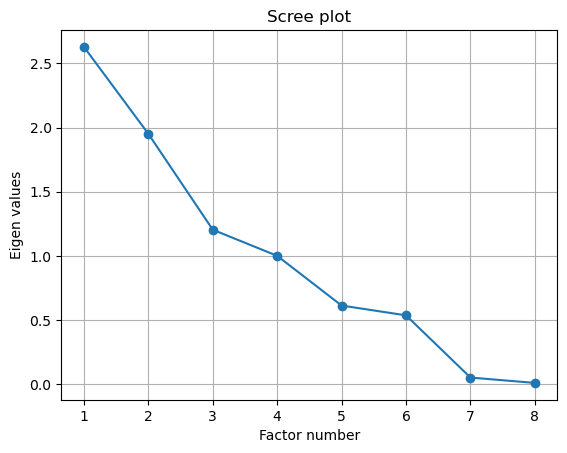

In [252]:
# Importing required libraries
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you already have your dataset loaded into 'APK' DataFrame and it's preprocessed

# Select numerical columns
numerical_vars = APK.select_dtypes(include=['float64'])

# Standardize the data
scaler = StandardScaler()
numerical_vars_scaled = scaler.fit_transform(numerical_vars)

# Perform PCA
pca = PCA()
pca.fit(numerical_vars_scaled)

# Eigenvalues (explained variance for each principal component)
eigval = pca.explained_variance_

# Number of components (k)
k = len(eigval)

# Scree plot
plt.plot(np.arange(1, k + 1), eigval, marker='o')
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.grid(True)
plt.savefig('Screeplot.png', bbox_inches='tight', dpi=300)
plt.show()


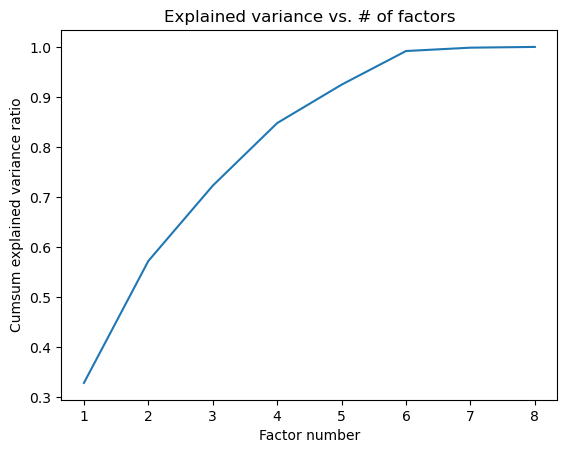

In [253]:
plt.plot(np.arange(1,k+1),np.cumsum(pca.explained_variance_ratio_)) 
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.savefig('CumSumPlot.png', bbox_inches='tight', dpi=300)
plt.show()

In [255]:
## 5 factors picked for expainability

In [258]:
eigval

array([2.62727289, 1.95070558, 1.20435089, 1.00108053, 0.61416811,
       0.53790141, 0.05368962, 0.01188291])

In [202]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.32883105 0.56766075 0.72139829 0.84537821 0.92350753 0.99134853
 0.99803734 1.        ]


# MCA

In [153]:
import pandas as pd
import numpy as np
import mca
import matplotlib.pyplot as plt

# Assuming APK_learn is your DataFrame, and categorical columns are encoded as integers
# Select columns that are of integer type (numerical encoded categorical columns)
categorical_columns = APK_learn.select_dtypes(include=['int64']).columns

# Run MCA using the mca library, specifying n_components for multiple components
mca_model = mca.MCA(APK_learn[categorical_columns], ncols=7)  # Request 7 components

# Access the MCA results (coordinates of the data points in the reduced space)
mca_results = mca_model.fs_r()  # Call the function to get the result

# Create a DataFrame with the MCA results
mca_df = pd.DataFrame(mca_results, columns=[f'MCA{i+1}' for i in range(mca_results.shape[1])])

# Display the first few rows of the MCA results
print(mca_df.head())


       MCA1
0  0.090216
1  0.158122
2  0.119318
3  0.158122
4  0.090216


In [ ]:
# Optionally, you can plot the first two components (MCA1 vs MCA2)
plt.figure(figsize=(10, 6))
plt.scatter(mca_df['MCA1'], mca_df['MCA2'], alpha=0.5)
plt.title('MCA: First Two Components')
plt.xlabel('MCA1')
plt.ylabel('MCA2')
plt.grid(True)
plt.show()

# Random Forest

In [260]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)  #% of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)  #create result table
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

print(missing_values_table(APK)) 

There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### include standardised float cols 

In [263]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Assuming APK_learn is your DataFrame and 'departure_status' is your target column

# Step 1: Separate the features and target variable
X = APK_learn.drop(columns=['departure_status'])  # All columns except the target
y = APK_learn['departure_status']  # Target variable

# Step 2: Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64']).columns
categorical_columns = X.select_dtypes(include=['int64']).columns

# Step 3: Preprocessing for numerical columns
# Impute missing values and standardize
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize numerical columns
])

# Step 4: Preprocessing for categorical columns
# Impute missing values and one-hot encode categorical columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

# Step 5: Combine both preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Fit and transform the X_train data using the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)

# Step 8: Define the Random Forest Classifier and the parameter grid for GridSearchCV
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
rf_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 9: Perform GridSearchCV with StratifiedKFold cross-validation
cv_folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_cv = GridSearchCV(rf, rf_grid, cv=cv_folds, n_jobs=-1, scoring='accuracy')

# Step 10: Fit the Random Forest model using GridSearchCV
rf_cv.fit(X_train_transformed, y_train)

# Step 11: Output the best hyperparameters found by GridSearchCV
print(f"Best hyperparameters: {rf_cv.best_params_}")

# Step 12: Transform the X_test data using the preprocessor and make predictions on the test set
X_test_transformed = preprocessor.transform(X_test)
y_pred = rf_cv.predict(X_test_transformed)

# Step 13: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9997
Classification Report:
              precision    recall  f1-score   support

     delayed       0.00      0.00      0.00         1
      onTime       1.00      1.00      1.00      3235

    accuracy                           1.00      3236
   macro avg       0.50      0.50      0.50      3236
weighted avg       1.00      1.00      1.00      3236



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [264]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Assuming APK_learn is your DataFrame and 'departure_status' is your target column

# Step 1: Separate the features and target variable
X = APK_learn.drop(columns=['departure_status'])  # All columns except the target
y = APK_learn['departure_status']  # Target variable

# Step 2: Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64']).columns
categorical_columns = X.select_dtypes(include=['int64']).columns

# Step 3: Preprocessing for numerical columns
# Impute missing values and standardize
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize numerical columns
])

# Step 4: Preprocessing for categorical columns
# Impute missing values and one-hot encode categorical columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

# Step 5: Combine both preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Step 6: Create the Random Forest Classifier pipeline (without setting hyperparameters yet)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))  # No hyperparameters set here yet
])

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Define the parameter grid for GridSearchCV
rf_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Step 9: Perform GridSearchCV with StratifiedKFold cross-validation
cv_folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_cv = GridSearchCV(rf_pipeline, rf_grid, cv=cv_folds, n_jobs=-1, scoring='accuracy')

# Step 10: Fit the model using GridSearchCV
rf_cv.fit(X_train, y_train)

# Step 11: Output the best hyperparameters found by GridSearchCV
print(f"Best hyperparameters: {rf_cv.best_params_}")

# Step 12: Make predictions on the test set
y_pred = rf_cv.predict(X_test)

# Step 13: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best hyperparameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Accuracy: 0.9997
Classification Report:
              precision    recall  f1-score   support

     delayed       0.00      0.00      0.00         1
      onTime       1.00      1.00      1.00      3235

    accuracy                           1.00      3236
   macro avg       0.50      0.50      0.50      3236
weighted avg       1.00      1.00      1.00      3236



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# random forest

In [266]:
APK_test

,destination_name,departure_status,temperature_2m,precipitation,rain,snowfall,wind_speed_10m,wind_gusts_10m,visibility,is_day,...,saturday,sunday,is_weekend_or_bank_holiday,pourc_validations,real_arrival_year,real_arrival_month,real_arrival_day,real_arrival_hour,real_arrival_minute,real_arrival_second
10784,3,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,0.00,2024,12,11,4,45,15
10785,3,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,0.01,2024,12,11,4,45,15
10786,3,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,0.00,2024,12,11,4,49,15
10787,3,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,0.01,2024,12,11,4,49,15
10788,4,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,0.00,2024,12,11,4,49,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,3,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,10.99,2024,12,24,18,36,28
14445,3,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,10.99,2024,12,24,18,38,1
14446,3,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,8.85,2024,12,24,18,38,1
14448,4,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,8.85,2024,12,24,18,40,34


In [286]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

APK_learn = APK
APK_test = APK

In [288]:
start_date = pd.to_datetime('2024-11-02 00:00:00')
end_date = pd.to_datetime('2024-12-10 23:59:59')

start_date2 = pd.to_datetime('2024-12-11 00:00:00')
end_date2 = pd.to_datetime('2024-12-31 23:59:59')

APK_learn = APK_learn[(APK_learn['real_arrival'] >= start_date) & (APK_learn['real_arrival'] <= end_date)]
APK_test = APK_test[(APK_test['real_arrival'] >= start_date2) & (APK_test['real_arrival'] <= end_date2)]

#APK_learn = APK_learn.drop(["scheduled_arrival"], axis=1)
#APK_learn["scheduled_arrival"] = APK_learn["scheduled_arrival"].astype(object)
# Convert datetime to numeric timestamp
#APK_learn['scheduled_arrival_numeric'] = APK_learn['scheduled_arrival'].apply(lambda x: x.timestamp())

In [290]:
APK_learn = APK_learn.copy()
APK_learn.loc[:, 'real_arrival' + '_year'] = APK_learn['real_arrival'].dt.year
APK_learn.loc[:, 'real_arrival' + '_month'] = APK_learn['real_arrival'].dt.month
APK_learn.loc[:, 'real_arrival' + '_day'] = APK_learn['real_arrival'].dt.day
APK_learn.loc[:, 'real_arrival' + '_hour'] = APK_learn['real_arrival'].dt.hour
APK_learn.loc[:, 'real_arrival' + '_minute'] = APK_learn['real_arrival'].dt.minute
APK_learn.loc[:, 'real_arrival' + '_second'] = APK_learn['real_arrival'].dt.second

APK_test = APK_test.copy()
APK_test.loc[:, 'real_arrival' + '_year'] = APK_test['real_arrival'].dt.year
APK_test.loc[:, 'real_arrival' + '_month'] = APK_test['real_arrival'].dt.month
APK_test.loc[:, 'real_arrival' + '_day'] = APK_test['real_arrival'].dt.day
APK_test.loc[:, 'real_arrival' + '_hour'] = APK_test['real_arrival'].dt.hour
APK_test.loc[:, 'real_arrival' + '_minute'] = APK_test['real_arrival'].dt.minute
APK_test.loc[:, 'real_arrival' + '_second'] = APK_test['real_arrival'].dt.second

In [292]:
APK_learn.drop(['real_arrival'], axis=1, inplace=True)  # Drop the original datetime column if not needed
APK_test.drop(['real_arrival'], axis=1, inplace=True)  # Drop the original datetime column if not needed

In [294]:
#APK_learn = APK_learn[['scheduled_arrival_numeric'] + [col for col in APK_learn.columns if col != 'scheduled_arrival_numeric']]

In [296]:
APK_learn

,destination_name,departure_status,temperature_2m,precipitation,rain,snowfall,wind_speed_10m,wind_gusts_10m,visibility,is_day,...,saturday,sunday,is_weekend_or_bank_holiday,pourc_validations,real_arrival_year,real_arrival_month,real_arrival_day,real_arrival_hour,real_arrival_minute,real_arrival_second
4,5,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,38,45
5,5,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,44,30
6,1,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,44,50
7,5,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,49,13
8,1,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,50,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,1,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,2.76,2024,12,10,23,37,57
5657,5,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,2.76,2024,12,10,23,39,44
5658,1,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,2.76,2024,12,10,23,42,15
5659,5,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,2.76,2024,12,10,23,44,8


In [298]:
# Assuming APK_learn is your DataFrame
# Extract the explanatory variables and the target variable
APK_learn_X = APK_learn.drop('departure_status', axis=1)  # Features (exclude target)
APK_learn_Y = APK_learn['departure_status']  # Target variable

# Train-test split (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(APK_learn_X, 
                                                    APK_learn_Y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [300]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
rf_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [302]:
# Perform GridSearchCV with StratifiedKFold cross-validation
cv_folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_cv = GridSearchCV(rf, rf_grid, cv=cv_folds, n_jobs=-1, scoring='accuracy')

In [304]:
rf_cv.fit(X_train, Y_train)

# Output the best hyperparameters found by GridSearchCV
print(f"Best hyperparameters: {rf_cv.best_params_}")

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [305]:
APK_learn

,destination_name,departure_status,temperature_2m,precipitation,rain,snowfall,wind_speed_10m,wind_gusts_10m,visibility,is_day,...,saturday,sunday,is_weekend_or_bank_holiday,pourc_validations,real_arrival_year,real_arrival_month,real_arrival_day,real_arrival_hour,real_arrival_minute,real_arrival_second
4,5,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,38,45
5,5,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,44,30
6,1,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,44,50
7,5,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,49,13
8,1,onTime,11.20,0.0,0.0,0.0,8.91,17.64,33060.0,0,...,1,0,1,6.69,2024,11,2,20,50,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,1,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,2.76,2024,12,10,23,37,57
5657,5,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,2.76,2024,12,10,23,39,44
5658,1,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,2.76,2024,12,10,23,42,15
5659,5,onTime,8.55,0.0,0.0,0.0,5.45,17.28,24340.0,0,...,0,0,0,2.76,2024,12,10,23,44,8


In [306]:
APK_test_X = APK_test.drop('departure_status', axis=1)  # Features (exclude target)
APK_test_Y = APK_test['departure_status']  # Target variable


In [307]:
# Evaluate the model on the test set
y_pred_train = rf_cv.predict(X_train)
y_pred_test = rf_cv.predict(APK_test_X)

# Print the accuracy on training and test sets
print(f"Training Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(APK_test_Y, y_pred_test):.4f}")

# Create DataFrames for plotting prediction vs true values
train_pred_vs_true = pd.DataFrame({'True': Y_train, 
                                   'Predicted': y_pred_train})

test_pred_vs_true = pd.DataFrame({'True': APK_test_Y, 
                                  'Predicted': y_pred_test})

Training Accuracy: 1.0000
Test Accuracy: 0.9990


In [308]:

# Assuming 'PRIMARY_KEY' is a column in your test set
# Create a DataFrame with PRIMARY_KEY and predicted target values
predictions_df = pd.DataFrame({
    'datetime': APK_test_X[['scheduled_arrival_year', 'scheduled_arrival_month', 'scheduled_arrival_day', 
                           'scheduled_arrival_hour', 'scheduled_arrival_minute', 'scheduled_arrival_second']].apply(
                            lambda row: '-'.join(row.astype(str)), axis=1),  # Combine as a single key
    'target': y_pred_test
})


# Save the predictions to a CSV file
predictions_df.to_csv('sigh.csv', index=False, sep=',', float_format='%.6f')  # Save with US decimal notation


KeyError: "None of [Index(['scheduled_arrival_year', 'scheduled_arrival_month',\n       'scheduled_arrival_day', 'scheduled_arrival_hour',\n       'scheduled_arrival_minute', 'scheduled_arrival_second'],\n      dtype='object')] are in the [columns]"

In [ ]:
hhhhh = pd.read_csv("sigh.csv")

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(APK_test_Y, y_pred_test)
print(conf_matrix)


In [ ]:
APK_test['departure_status'].value_counts()